# Setup

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# %%capture
!pip install kmapper==2.0.1 matplotlib==3.4.1 numpy scikit_learn==1.0.2 umap umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.6 MB/s eta 0:00:00
  Created wheel for matplotlib: filename=matplotlib-3.4.1-cp310-cp310-linux_x86_64.whl size=10425911 sha256=cdcb91cb99f57adde6d6246d2f8a10286a12d931d9bb3fc43bc49728f7d03200
  Stored in directory: /root/.cache/pip/wheels/4d/84/33/44631b04443c528df9a892f4f274e319c81c8b15fa6c37bb4c
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3543 sha256=06dd5ea4516bcb2546e1dfef692757ae964c928f81bf55aae6794355bd2096e4
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217

In [ ]:
# numpy==1.19.4
# yfinance==0.1.63
# umap==0.1.1 umap-learn==0.4.6

In [ ]:
!pip show kmapper

Name: kmapper
Version: 2.0.1
Summary: Python implementation of Mapper algorithm for Topological Data Analysis.
Home-page: http://kepler-mapper.scikit-tda.org
Author: HJ van Veen, Nathaniel Saul
Author-email: info@mlwave.com, nat@saulgill.com
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: Jinja2, numpy, scikit-learn, scipy
Required-by: 


In [ ]:
import yfinance as yf
import kmapper as km
from kmapper.jupyter import display
import umap
import sklearn
import sklearn.manifold as manifold
import numpy as np
import matplotlib.pyplot as plt

### Get data

In [ ]:
# read text file with ticker names
filename = open("SP500_tickernames.txt", "r")
raw_tickernames = filename.read()
ticker_names = raw_tickernames.split("\n")
ticker_names = ticker_names[:len(ticker_names)-1]

In [ ]:
# define date range
start_date_string = "2020-01-01"
end_date_string = "2022-04-02"

# pull historical data
raw_data = yf.download(ticker_names, start=start_date_string, end=end_date_string)

[*********************100%%**********************]  495 of 495 completed
ERROR:yfinance:
28 Failed downloads:
ERROR:yfinance:['NLSN', 'CDAY', 'FRC', 'DISCA', 'FLT', 'VIAC', 'FB', 'NLOK', 'PKI', 'PEAK', 'CERN', 'DRE', 'FBHS', 'ANTM', 'CTXS', 'PBCT', 'ATVI', 'TWTR', 'RE', 'ABC', 'PXD', 'DISCK', 'DISH', 'XLNX', 'BLL', 'INFO']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
ERROR:yfinance:['FISV']: YFChartError("%ticker%: Data doesn't exist for startDate = 1577854800, endDate = 1648872000")
ERROR:yfinance:['SIVB']: YFInvalidPeriodError("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")


In [ ]:
# get daily close prices and drop missing columns
df_close = raw_data['Adj Close'].dropna(axis='columns')

In [ ]:
# convert pandas dataframe to numpy array, standardize ticker data, and transpose array
data = df_close.to_numpy()
data = data-np.mean(data, axis=0)/np.std(data, axis=0)
data = data.transpose()

In [ ]:
# calculate percent return of each ticker over date range
per_return = (df_close.to_numpy().transpose()[:,504] - df_close.to_numpy().transpose()[:,0])/df_close.to_numpy().transpose()[:,0]

### Mapper

In [31]:
# initialize mapper
# mapper = km.KeplerMapper(verbose=1)

In [30]:
# project data into 2D subsapce via 2 step transformation, 1)isomap 2)UMAP
# projected_data = mapper.fit_transform(data, projection=[manifold.Isomap(n_components=100, n_jobs=-1), umap.UMAP(n_components=2,random_state=1)])

In [29]:
# cluster data using DBSCAN
# G = mapper.map(projected_data, data, clusterer=sklearn.cluster.DBSCAN(metric="cosine"))

In [ ]:
# define an excessively long filename (helpful if saving multiple Mapper variants for single dataset)
fileID = 'projection=' + G['meta_data']['projection'].split('(')[0] + '_' + \
'n_cubes=' + str(G['meta_data']['n_cubes']) + '_' + \
'perc_overlap=' + str(G['meta_data']['perc_overlap']) + '_' + \
'clusterer=' + G['meta_data']['clusterer'].split('(')[0] + '_' + \
'scaler=' + G['meta_data']['scaler'].split('(')[0]

In [32]:
# visualize graph
# mapper.visualize(G,
#                 path_html="mapper_example_" + fileID + ".html",
#                 title=fileID,
#                 custom_tooltips = df_close.columns.to_numpy(),
#                 color_values = np.log(per_return+1),
#                 color_function_name = 'Log Percent Returns',
#                 node_color_function = np.array(['average', 'std', 'sum', 'max', 'min']))

# display mapper in jupyter
# km.jupyter.display("mapper_example_" + fileID + ".html")

In [22]:
# initialize mapper
mapper = km.KeplerMapper(verbose=1)

# project data into 2D subsapce via 2 step transformation, 1)isomap 2)UMAP
projected_data = mapper.fit_transform(data, projection=[manifold.Isomap(n_components=100, n_jobs=-1), umap.UMAP(n_components=2,random_state=1)])

# cluster data using DBSCAN
# G = mapper.map(projected_data, data, clusterer=sklearn.cluster.DBSCAN(metric="cosine"))
graph = mapper.map(projected_data, data, clusterer=sklearn.cluster.DBSCAN(metric="cosine"))

KeplerMapper(verbose=1)
..Composing projection pipeline of length 2:
	Projections: Isomap(n_components=100, n_jobs=-1)
		UMAP(random_state=1)
	Distance matrices: False
False
	Scalers: MinMaxScaler()
MinMaxScaler()
..Projecting on data shaped (467, 568)

..Projecting data using: 
	Isomap(n_components=100, n_jobs=-1)



/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])



..Scaling with: MinMaxScaler()

..Projecting on data shaped (467, 100)

..Projecting data using: 
	UMAP(random_state=1, verbose=1)

UMAP(n_jobs=1, random_state=1, verbose=1)
Tue Jul 23 14:56:46 2024 Construct fuzzy simplicial set


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Tue Jul 23 14:56:47 2024 Finding Nearest Neighbors
Tue Jul 23 14:56:47 2024 Finished Nearest Neighbor Search
Tue Jul 23 14:56:47 2024 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Tue Jul 23 14:56:49 2024 Finished embedding

..Scaling with: MinMaxScaler()

Mapping on data shaped (467, 568) using lens shaped (467, 2)

Creating 100 hypercubes.

Created 50 edges and 30 nodes in 0:00:00.058866.


Wrote visualization to: kepler-mapper-output.html
Download kepler-mapper-output.html and open it with a browser to see the results.


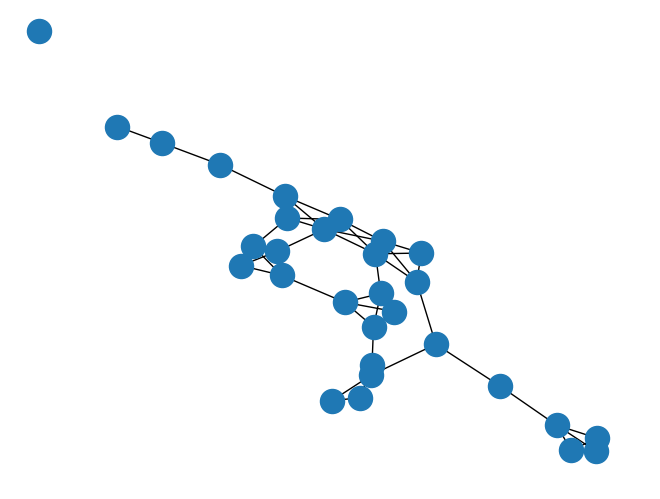

In [25]:
# https://colab.research.google.com/github/shizuo-kaji/TutorialTopologicalDataAnalysis/blob/master/TopologicalDataAnalysisWithPython.ipynb#scrollTo=w41pQN-zHPcB

import kmapper, kmapper.jupyter
from sklearn.preprocessing import StandardScaler
import networkx as nx

# km = kmapper.KeplerMapper()
# X_std = StandardScaler().fit_transform(X)   # standardise
# f = km.project(X_std,projection="sum") # we have to choose a 1-dim projection
# graph = km.map(lens=f, X=X_std, clusterer=sklearn.cluster.DBSCAN(metric="cosine",algorithm='auto', eps=0.3, leaf_size=10))

nx.draw(kmapper.adapter.to_nx(graph))
#km.visualize(graph, color_function=Y, custom_tooltips=Y, path_html="kepler-mapper-output.html") # To download the output, look at the beginning of this note
# km.visualize(graph, custom_tooltips=Y, path_html="kepler-mapper-output.html") # To download the output, look at the beginning of this note
mapper.visualize(graph, path_html="kepler-mapper-output.html") # To download the output, look at the beginning of this note
print("Download kepler-mapper-output.html and open it with a browser to see the results.")
# the following rich visualisation does not work with Google Colab.
# download "kepler-mapper-output.html" and open it locally with a browser
#kmapper.jupyter.display(path_html="kepler-mapper-output.html")

In [33]:
from google.colab import files
files.download("mapper_example_" + fileID + ".html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

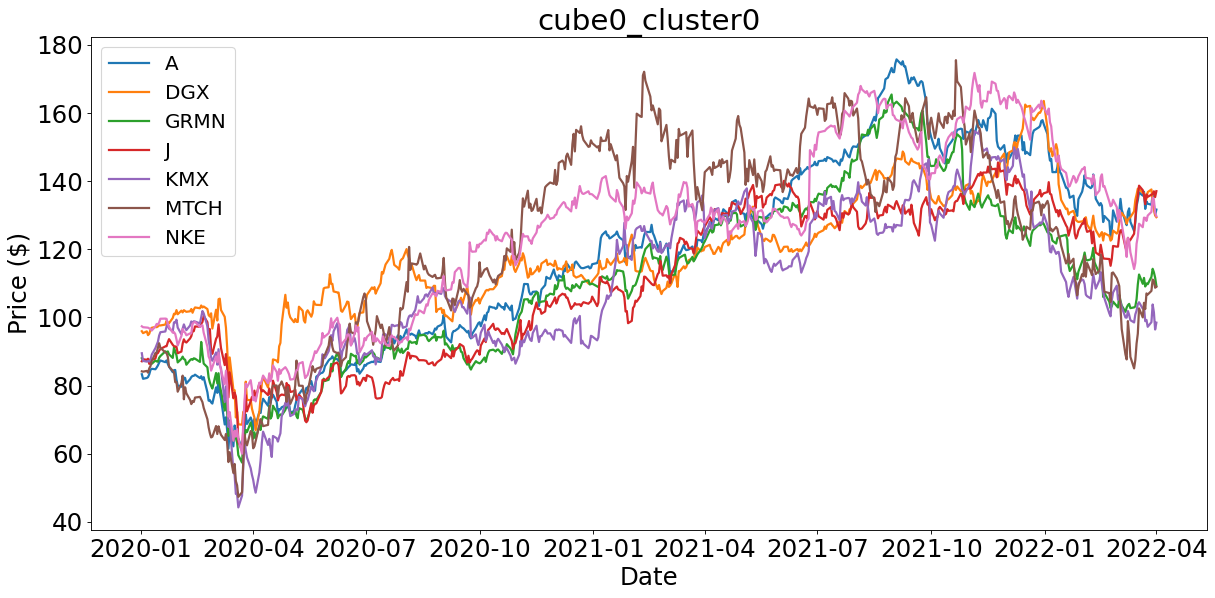

In [ ]:
nodeid = 'cube0_cluster0'
node = G['nodes'][nodeid]


plt.figure(figsize=(18, 8), dpi=80)
plt.rcParams.update({'font.size': 22})

for i in node:
    plt.plot(df_close.iloc[:,i], linewidth=2)

plt.legend(list(df_close.columns[node]), fontsize=18)
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title(nodeid)

plt.savefig("mapper_example_" + fileID + ".png", dpi='figure', format=None, metadata=None,
        bbox_inches=None, pad_inches=0.1,
        facecolor='white', edgecolor='auto')

In [ ]:
# convert notebook to python script
!jupyter nbconvert --to script mapper_example.ipynb

[NbConvertApp] WARNING | pattern 'mapper_example.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
